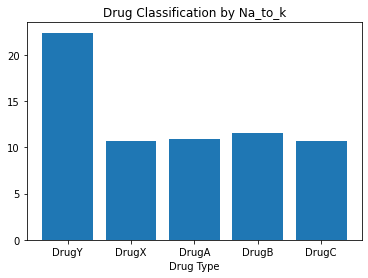

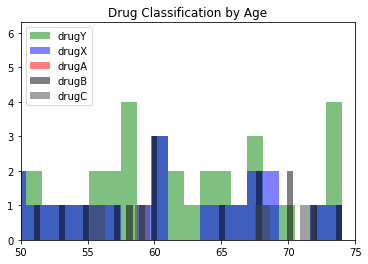

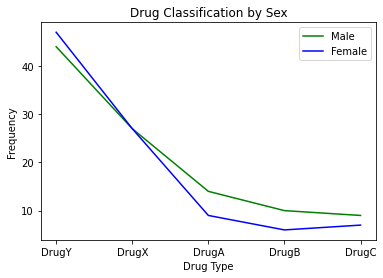

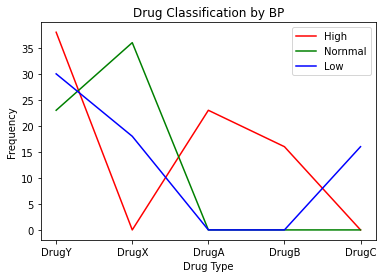

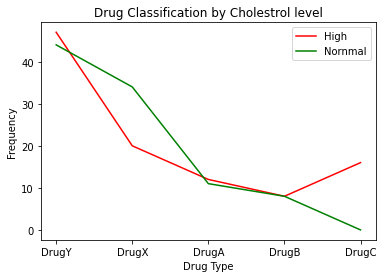

In [24]:
# Task 1, 2 and 3

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

drugList = pd.read_csv("drug200.csv")

## Spliting into 5 groups
drugY = drugList.loc[drugList['Drug'] == "drugY"]
drugX = drugList.loc[drugList['Drug'] == "drugX"]
drugA = drugList.loc[drugList['Drug'] == "drugA"]
drugB = drugList.loc[drugList['Drug'] == "drugB"]
drugC = drugList.loc[drugList['Drug'] == "drugC"]


xAxis = ["DrugY", "DrugX", "DrugA", "DrugB", "DrugC"]
yAxis = [drugY['Na_to_K'].mean(), drugX['Na_to_K'].mean(), drugA['Na_to_K'].mean(), drugB['Na_to_K'].mean(), drugC['Na_to_K'].mean()]

# drugY.plot(x = 'Age', y='Na_to_K', label="drugY")
# drugX.plot(x = 'Age', y='Na_to_K', label="drugX")
# drugA.plot(x = 'Age', y='Na_to_K', label="drugA")
# drugB.plot(x = 'Age', y='Na_to_K', label="drugB")
# drugC.plot(x = 'Age', y='Na_to_K', label="drugC")

plt.bar(xAxis, yAxis)


yAxis = [drugY['Age'].mean(), drugX['Age'].mean(), drugA['Age'].mean(), drugB['Age'].mean(), drugC['Age'].mean()]

plt.title("Drug Classification")
plt.xlabel("Drug Type")

plt.plot(xAxis, yAxis, label= 'Age')

# yAxis = [drugY['Sex'], drugX['Sex'], drugA['Sex'], drugB['Sex'], drugC['Sex']]

# plt.plot(xAxis, yAxis)

drugList.plot.bar(rot=0)

plt.savefig("drugClassification.pdf", format="pdf", bbox_inches="tight")

In [50]:
# Task 4 and 5
import sklearn.model_selection as model_selection

drugList = pd.read_csv("drug200.csv")
drugList.BP = pd.get_dummies(drugList.BP, ['LOW', 'NORMAL', 'HIGH'])
drugList.Cholesterol = pd.get_dummies(drugList.Cholesterol, ['NORMAL', 'HIGH'])
drugList.Sex = pd.get_dummies(drugList.Sex, ['F', 'M'])

# X = data, Y = labels of data
X = drugList[['Age','Sex','BP','Cholesterol','Na_to_K']]
Y = drugList['Drug']

# Use X_train and Y_train to train, then test model on X_test and Y_test
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y)

In [51]:
# Task 6
# a) Gaussian NB

import sklearn
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import f1_score

accu = []
avg = []
weighted = []

for i in range(10):
  GaussB = GaussianNB()
  GaussB.fit(X_train, Y_train)

  Y_expect = Y_test
  Y_predict = GaussB.predict(X_test)

  acc = accuracy_score(Y_test, Y_predict) * 100
  f1_avg = f1_score(Y_test, Y_predict, average='macro')
  f1_weighted = f1_score(Y_test, Y_predict, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predict)

  confusion_matrix(Y_test, Y_predict)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

[70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0, 70.0]
[0.6722993545244185, 0.6722993545244185, 0.6722993545244185, 0.6722993545244185, 0.6722993545244185, 0.6722993545244185, 0.6722993545244185, 0.6722993545244185, 0.6722993545244185, 0.6722993545244185]
[0.7192510047497259, 0.7192510047497259, 0.7192510047497259, 0.7192510047497259, 0.7192510047497259, 0.7192510047497259, 0.7192510047497259, 0.7192510047497259, 0.7192510047497259, 0.7192510047497259]
Accuracy Average:  70.0
Accuracy Standard deviation:  0.0
F1 Macro Average:  0.6722993545244185
F1 Macro Standard deviation:  0.0
F1 Weighted Average:  0.7192510047497259
F1 Weighted Standard deviation:  0.0


In [52]:
 # Task 6
# b) Base-Decision-Tree

from sklearn.tree import DecisionTreeClassifier

accu = []
avg = []
weighted = []

for i in range(10):
  DTClassifier = DecisionTreeClassifier()
  DTClassifier.fit(X_train, Y_train)

  Y_predicted = DTClassifier.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predicted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

[84.0, 84.0, 84.0, 84.0, 86.0, 84.0, 84.0, 86.0, 84.0, 84.0]
[0.7533333333333333, 0.7647619047619048, 0.7647619047619048, 0.7647619047619048, 0.7819274977895668, 0.7647619047619048, 0.7647619047619048, 0.7819274977895668, 0.7533333333333333, 0.7533333333333333]
[0.8366666666666666, 0.8426666666666667, 0.8426666666666667, 0.8426666666666667, 0.8605446507515474, 0.8426666666666667, 0.8426666666666667, 0.8605446507515474, 0.8366666666666666, 0.8366666666666666]
Accuracy Average:  84.4
Accuracy Standard deviation:  0.8
F1 Macro Average:  0.7647664519388656
F1 Macro Standard deviation:  0.009905310171359288
F1 Weighted Average:  0.8444422634836428
F1 Weighted Standard deviation:  0.008460007029039304


In [53]:
# Task 6
# c) Top-Decision-Tree

from sklearn.model_selection import GridSearchCV
accu = []
avg = []
weighted = []

for i in range(10):
  DTClassifier = DecisionTreeClassifier()

  params = {
      "criterion": ["gini", "entropy"],
      "max_depth": [5,15],
      "min_samples_split": [2,7,15]
  }

  clf = GridSearchCV(DTClassifier, params)
  clf.fit(X_train, Y_train)
  print("Best parameters: ", clf.best_params_)

  Y_predicted = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  report = classification_report(Y_test, Y_predicted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 7}
[80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0, 80.0]
[0.6462745098039215, 0.6462745098039215, 0.6462745098039215, 0.6462745098039215, 0.6462745098039215, 0.6462745098039215, 0.6462745098039215

In [54]:
# Task 6
# d) Perceptron

from sklearn.linear_model import Perceptron
print("Training Perceptron:\n")

accu = []
avg = []
weighted = []

for i in range(10):
  clf = Perceptron()
  clf.fit(X_train, Y_train)
  Y_predicted = clf.predict(X_test)

  report = classification_report(Y_test, Y_predicted)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

Training Perceptron:

[60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0, 60.0]
[0.35699699699699694, 0.35699699699699694, 0.35699699699699694, 0.35699699699699694, 0.35699699699699694, 0.35699699699699694, 0.35699699699699694, 0.35699699699699694, 0.35699699699699694, 0.35699699699699694]
[0.5406846846846846, 0.5406846846846846, 0.5406846846846846, 0.5406846846846846, 0.5406846846846846, 0.5406846846846846, 0.5406846846846846, 0.5406846846846846, 0.5406846846846846, 0.5406846846846846]
Accuracy Average:  60.0
Accuracy Standard deviation:  0.0
F1 Macro Average:  0.35699699699699694
F1 Macro Standard deviation:  0.0
F1 Weighted Average:  0.5406846846846846
F1 Weighted Standard deviation:  0.0


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [55]:
# Task 6
# e) Base-MLP
from sklearn.neural_network import MLPClassifier

accu = []
avg = []
weighted = []

for i in range(10):
  clf = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', solver='sgd').fit(X_train, Y_train)
  Y_predicted = clf.predict(X_test)

  report = classification_report(Y_test, Y_predicted)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicte

[54.0, 56.00000000000001, 57.99999999999999, 57.99999999999999, 56.00000000000001, 57.99999999999999, 57.99999999999999, 56.00000000000001, 57.99999999999999, 54.0]
[0.23272727272727273, 0.24587813620071683, 0.25849056603773585, 0.2627450980392157, 0.24587813620071683, 0.25849056603773585, 0.25849056603773585, 0.24587813620071683, 0.25849056603773585, 0.23272727272727273]
[0.4327272727272728, 0.4531182795698925, 0.4728301886792453, 0.4776470588235294, 0.4531182795698925, 0.4728301886792453, 0.4728301886792453, 0.4531182795698925, 0.4728301886792453, 0.4327272727272728]
Accuracy Average:  56.6
Accuracy Standard deviation:  1.562049935181327
F1 Macro Average:  0.24997963162468553
F1 Macro Standard deviation:  0.010480723831407163
F1 Weighted Average:  0.45937771977047337
F1 Weighted Standard deviation:  0.016111110633597683


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier()

params = {
    "activation": ["logistic", "tanh", "relu", "identity"],
    "hidden_layer_sizes": [(30, 50), (10, 10, 10)],
    "solver": ["adam","sgd"]
}

accu = []
avg = []
weighted = []

for i in range(10):
  clf = GridSearchCV(mlp, params)
  clf.fit(X_train, Y_train)
  print("Best parameters: ", clf.best_params_)

  Y_predicted = clf.predict(X_test)

  acc = accuracy_score(Y_test, Y_predicted) * 100
  f1_avg = f1_score(Y_test, Y_predicted, average='macro')
  f1_weighted = f1_score(Y_test, Y_predicted, average='weighted')
  accu.append(acc)
  avg.append(f1_avg)
  weighted.append(f1_weighted)
  report = classification_report(Y_test, Y_predicted)

  confusion_matrix(Y_test, Y_predicted)

print(accu)
print(avg)
print(weighted)
print("Accuracy Average: ", np.mean(accu))
print("Accuracy Standard deviation: ", np.std(accu))
print("F1 Macro Average: ", np.mean(avg))
print("F1 Macro Standard deviation: ", np.std(avg))
print("F1 Weighted Average: ", np.mean(weighted))
print("F1 Weighted Standard deviation: ", np.std(weighted))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best parameters:  {'activation': 'tanh', 'hidden_layer_sizes': (30, 50), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
